<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n250.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.343433,59.515181,84.784868,-4667.970282,-4472.326799,-56.254229,-4416.072570
1,0.0,1.0,57.182373,61.302364,65.380770,-1081.318276,-887.452769,322.072878,-1209.525647
2,0.0,2.0,80.785142,46.054460,81.532793,-2168.179145,-1949.806749,-696.955782,-1252.850967
3,0.0,3.0,91.744037,89.013808,66.512866,-6300.245382,-6042.974670,-335.119922,-5707.854748
4,0.0,4.0,37.278227,27.990745,49.221885,-1224.087505,-1099.596648,1219.938357,-2319.535005
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.047836,50.677549,21.336552,-570.048220,-436.986284,-398.459168,-38.527116
59996,999.0,56.0,80.586907,61.507429,92.950975,2039.894342,2284.939653,197.476347,2087.463306
59997,999.0,57.0,64.784844,85.086670,80.148414,7459.149382,7699.169310,-733.164311,8432.333621
59998,999.0,58.0,40.941725,65.428691,94.407376,-6154.079181,-5943.301387,-222.045006,-5721.256381


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.343433,59.515181,84.784868,-4667.970282,-4472.326799,-56.254229,-4416.072570
1,0.0,1.0,57.182373,61.302364,65.380770,-1081.318276,-887.452769,322.072878,-1209.525647
2,0.0,2.0,80.785142,46.054460,81.532793,-2168.179145,-1949.806749,-696.955782,-1252.850967
3,0.0,3.0,91.744037,89.013808,66.512866,-6300.245382,-6042.974670,-335.119922,-5707.854748
4,0.0,4.0,37.278227,27.990745,49.221885,-1224.087505,-1099.596648,1219.938357,-2319.535005
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.047836,50.677549,21.336552,-570.048220,-436.986284,-398.459168,-38.527116
59996,999.0,56.0,80.586907,61.507429,92.950975,2039.894342,2284.939653,197.476347,2087.463306
59997,999.0,57.0,64.784844,85.086670,80.148414,7459.149382,7699.169310,-733.164311,8432.333621
59998,999.0,58.0,40.941725,65.428691,94.407376,-6154.079181,-5943.301387,-222.045006,-5721.256381


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    41.343433  59.515181  ...   -56.254229 -4416.072570
      1.0    57.182373  61.302364  ...   322.072878 -1209.525647
      2.0    80.785142  46.054460  ...  -696.955782 -1252.850967
      3.0    91.744037  89.013808  ...  -335.119922 -5707.854748
      4.0    37.278227  27.990745  ...  1219.938357 -2319.535005
...                ...        ...  ...          ...          ...
999.0 55.0   51.047836  50.677549  ...  -398.459168   -38.527116
      56.0   80.586907  61.507429  ...   197.476347  2087.463306
      57.0   64.784844  85.086670  ...  -733.164311  8432.333621
      58.0   40.941725  65.428691  ...  -222.045006 -5721.256381
      59.0   43.830281  67.222321  ...  -610.632616 -5396.052234

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    41.343433  59.515181  ...   -56.254229 -4416.072570
      1.0    57.182373  61.302364  ...   322.072878 -1209.525647
      2.0    80.785142  46.054460  ...  -696.955782 -1252.850967
      3.0    91.744037  89.013808  ...  -335.119922 -5707.854748
      4.0    37.278227  27.990745  ...  1219.938357 -2319.535005
...                ...        ...  ...          ...          ...
999.0 55.0   51.047836  50.677549  ...  -398.459168   -38.527116
      56.0   80.586907  61.507429  ...   197.476347  2087.463306
      57.0   64.784844  85.086670  ...  -733.164311  8432.333621
      58.0   40.941725  65.428691  ...  -222.045006 -5721.256381
      59.0   43.830281  67.222321  ...  -610.632616 -5396.052234

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,41.343433,59.515181,84.784868,-4667.970282,-4472.326799,-56.254229,-4416.072570
1,0.0,1.0,57.182373,61.302364,65.380770,-1081.318276,-887.452769,322.072878,-1209.525647
2,0.0,2.0,80.785142,46.054460,81.532793,-2168.179145,-1949.806749,-696.955782,-1252.850967
3,0.0,3.0,91.744037,89.013808,66.512866,-6300.245382,-6042.974670,-335.119922,-5707.854748
4,0.0,4.0,37.278227,27.990745,49.221885,-1224.087505,-1099.596648,1219.938357,-2319.535005
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.047836,50.677549,21.336552,-570.048220,-436.986284,-398.459168,-38.527116
59996,999.0,56.0,80.586907,61.507429,92.950975,2039.894342,2284.939653,197.476347,2087.463306
59997,999.0,57.0,64.784844,85.086670,80.148414,7459.149382,7699.169310,-733.164311,8432.333621
59998,999.0,58.0,40.941725,65.428691,94.407376,-6154.079181,-5943.301387,-222.045006,-5721.256381


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat        e_hat
rep   index                        ...                          
0.0   0.0    41.343433  59.515181  ...   -56.254229 -4416.072570
      1.0    57.182373  61.302364  ...   322.072878 -1209.525647
      2.0    80.785142  46.054460  ...  -696.955782 -1252.850967
      3.0    91.744037  89.013808  ...  -335.119922 -5707.854748
      4.0    37.278227  27.990745  ...  1219.938357 -2319.535005
...                ...        ...  ...          ...          ...
999.0 55.0   51.047836  50.677549  ...  -398.459168   -38.527116
      56.0   80.586907  61.507429  ...   197.476347  2087.463306
      57.0   64.784844  85.086670  ...  -733.164311  8432.333621
      58.0   40.941725  65.428691  ...  -222.045006 -5721.256381
      59.0   43.830281  67.222321  ...  -610.632616 -5396.052234

[60000 rows x 7 columns]

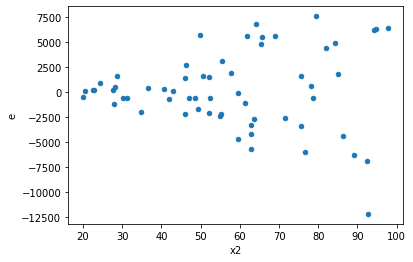

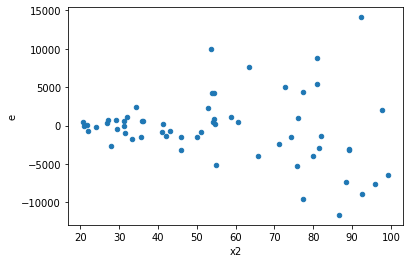

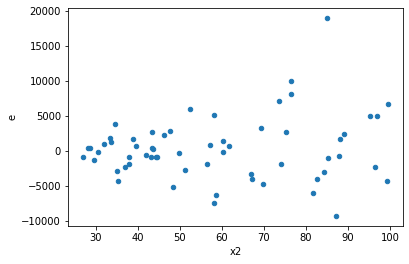

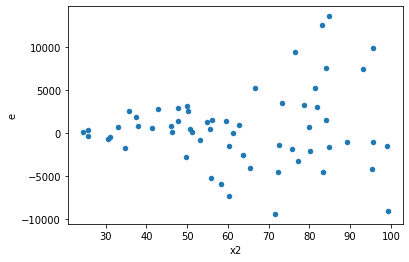

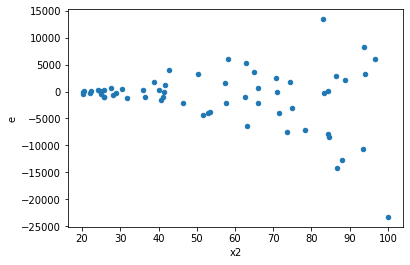

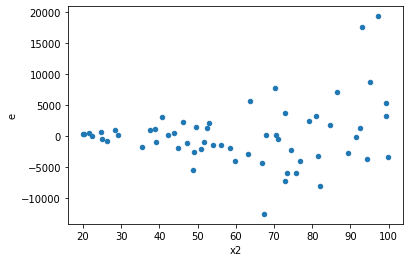

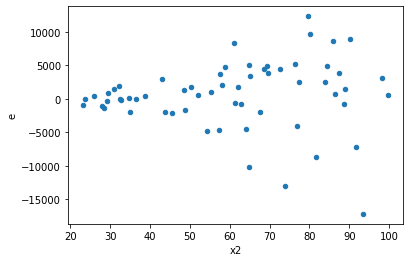

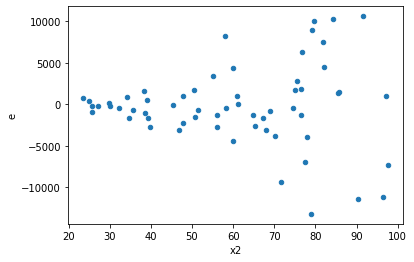

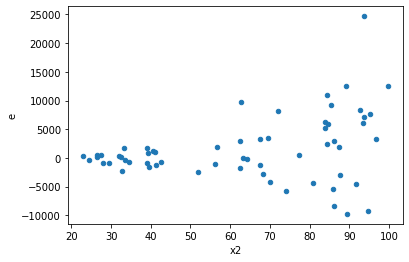

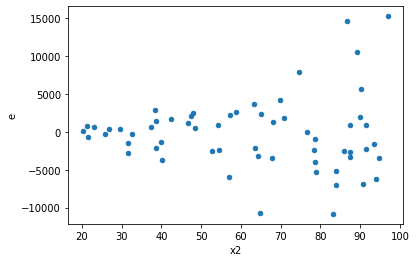

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,21.0,21.0,52126507.29609646,696055587.5274895,2482214.6331474506,33145504.167975694,13.353198279210513,1.3765425732614744e-07,0.9999999311728713,6.882712866307372e-08,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,25774516.883656383,807526717.425042,1227357.94684078,38453653.210716285,31.330430792171107,3.875189058533124e-11,0.999999999980624,1.937594529266562e-11,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,73591317.7959519,886705087.3437847,3504348.4664739002,42224051.77827546,12.049044831652143,3.5092260697311417e-07,0.9999998245386965,1.7546130348655709e-07,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,43389638.27710735,739670288.0780644,2066173.2512908261,35222394.67038402,17.047164195151154,1.416400863263334e-08,0.9999999929179957,7.08200431631667e-09,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,12230204.99568317,1257432522.0994465,582390.7140801509,59877739.14759269,102.81369139301229,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,60286881.27181588,852746837.3139837,2870803.8700864706,40606992.25304684,14.144815908940421,8.100918980069594e-08,0.9999999594954051,4.050459490034797e-08,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,58372010.06045428,821412913.3075434,2779619.526688299,39114900.63369254,14.072034052910439,8.496286518777652e-08,0.9999999575185674,4.248143259388826e-08,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,50778404.69571722,1103346823.1893501,2418019.2712246296,52540324.91377858,21.728662603738893,1.3942589305315778e-09,0.9999999993028705,6.971294652657889e-10,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,29363204.30737757,1374298480.372222,1398247.8241608366,65442784.77962962,46.80342329079277,6.974421040695233e-13,0.9999999999996513,3.4872105203476167e-13,Reject001=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,52126507.29609646,696055587.5274895,2482214.6331474506,33145504.167975694,13.353198279210513,1.3765425732614744e-07,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,25774516.883656383,807526717.425042,1227357.94684078,38453653.210716285,31.330430792171107,3.875189058533124e-11,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,73591317.7959519,886705087.3437847,3504348.4664739002,42224051.77827546,12.049044831652143,3.5092260697311417e-07,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,43389638.27710735,739670288.0780644,2066173.2512908261,35222394.67038402,17.047164195151154,1.416400863263334e-08,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,12230204.99568317,1257432522.0994465,582390.7140801509,59877739.14759269,102.81369139301229,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,60286881.27181588,852746837.3139837,2870803.8700864706,40606992.25304684,14.144815908940421,8.100918980069594e-08,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,58372010.06045428,821412913.3075434,2779619.526688299,39114900.63369254,14.072034052910439,8.496286518777652e-08,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,50778404.69571722,1103346823.1893501,2418019.2712246296,52540324.91377858,21.728662603738893,1.3942589305315778e-09,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,29363204.30737757,1374298480.372222,1398247.8241608366,65442784.77962962,46.80342329079277,6.974421040695233e-13,Reject001=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    999
Reject001=1 : Homoscedasticity        1
Name: Result_test, dtype: int64